In [118]:
import pandas as pd
import plotly
import plotly.express as px
import numpy as np

### Read the arabica data set into a dataframe
You will notice an "Unnamed: 0" column. Where does it come from, how can one get "rid" of it?

In [119]:
coffee_df = pd.read_csv("../../../data/arabica_data_cleaned.csv")
coffee_df.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [120]:
coffee_df = coffee_df.set_index("Unnamed: 0")
coffee_df.index.name = None
coffee_df.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


## Drop some categorical columns
The dataset is rich in meta data, however we just want to keep "Country.of.Origin", "Producer", "Processing.Method". How to drop the rest?
While you're at it rename the three columns we want to keep so they do not have dots but space in their name. 

In [121]:
coffee_num = coffee_df.select_dtypes(exclude = object)
coffee_objects = [coffee_df["Country.of.Origin"], coffee_df["Producer"], coffee_df["Processing.Method"]]
headers = ["Country.of.Origin","Producer","Processing.Method"]
df_reduced = pd.concat(coffee_objects, axis = 1, keys = headers)

coffee_df_reduced = df_reduced.join(coffee_num)
coffee_df_reduced.head()

,Country.of.Origin,Producer,Processing.Method,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,...,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Ethiopia,METAD PLC,Washed / Wet,300,8.67,8.83,8.67,8.75,8.50,8.42,...,10.0,8.75,90.58,0.12,0,0.0,0,1950.0,2200.0,2075.0
2,Ethiopia,METAD PLC,Washed / Wet,300,8.75,8.67,8.50,8.58,8.42,8.42,...,10.0,8.58,89.92,0.12,0,0.0,1,1950.0,2200.0,2075.0
3,Guatemala,NaN,NaN,5,8.42,8.50,8.42,8.42,8.33,8.42,...,10.0,9.25,89.75,0.00,0,0.0,0,1600.0,1800.0,1700.0
4,Ethiopia,Yidnekachew Dabessa Coffee Plantation,Natural / Dry,320,8.17,8.58,8.42,8.42,8.50,8.25,...,10.0,8.67,89.00,0.11,0,0.0,2,1800.0,2200.0,2000.0
5,Ethiopia,METAD PLC,Washed / Wet,300,8.25,8.50,8.25,8.50,8.42,8.33,...,10.0,8.58,88.83,0.12,0,0.0,2,1950.0,2200.0,2075.0


In [122]:
coffee_df_reduced.rename(columns = {col:col.replace('_', ' ') for col in coffee_df_reduced.columns}, inplace=True)
coffee_df_reduced.rename(columns = {col:col.replace('.', ' ') for col in coffee_df_reduced.columns}, inplace=True)

coffee_df_reduced.head()

,Country of Origin,Producer,Processing Method,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,...,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Category Two Defects,altitude low meters,altitude high meters,altitude mean meters
1,Ethiopia,METAD PLC,Washed / Wet,300,8.67,8.83,8.67,8.75,8.50,8.42,...,10.0,8.75,90.58,0.12,0,0.0,0,1950.0,2200.0,2075.0
2,Ethiopia,METAD PLC,Washed / Wet,300,8.75,8.67,8.50,8.58,8.42,8.42,...,10.0,8.58,89.92,0.12,0,0.0,1,1950.0,2200.0,2075.0
3,Guatemala,NaN,NaN,5,8.42,8.50,8.42,8.42,8.33,8.42,...,10.0,9.25,89.75,0.00,0,0.0,0,1600.0,1800.0,1700.0
4,Ethiopia,Yidnekachew Dabessa Coffee Plantation,Natural / Dry,320,8.17,8.58,8.42,8.42,8.50,8.25,...,10.0,8.67,89.00,0.11,0,0.0,2,1800.0,2200.0,2000.0
5,Ethiopia,METAD PLC,Washed / Wet,300,8.25,8.50,8.25,8.50,8.42,8.33,...,10.0,8.58,88.83,0.12,0,0.0,2,1950.0,2200.0,2075.0


## Clean the data set
The dataset does not seem to be as clean as the filename might suggest. How can you get a quick overview over the data and identify which columns have extreme outliers? If you cannot using pd commands, try to plot (see next question)!

In [123]:
coffee_df_reduced.describe()

,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Category Two Defects,altitude low meters,altitude high meters,altitude mean meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [124]:
coffee_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 1 to 1312
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     1310 non-null   object 
 1   Producer              1081 non-null   object 
 2   Processing Method     1159 non-null   object 
 3   Number of Bags        1311 non-null   int64  
 4   Aroma                 1311 non-null   float64
 5   Flavor                1311 non-null   float64
 6   Aftertaste            1311 non-null   float64
 7   Acidity               1311 non-null   float64
 8   Body                  1311 non-null   float64
 9   Balance               1311 non-null   float64
 10  Uniformity            1311 non-null   float64
 11  Clean Cup             1311 non-null   float64
 12  Sweetness             1311 non-null   float64
 13  Cupper Points         1311 non-null   float64
 14  Total Cup Points      1311 non-null   float64
 15  Moisture             

In [125]:
coffee_df_reduced.dropna(inplace = True , axis = 0)
coffee_df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1 to 1310
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     924 non-null    object 
 1   Producer              924 non-null    object 
 2   Processing Method     924 non-null    object 
 3   Number of Bags        924 non-null    int64  
 4   Aroma                 924 non-null    float64
 5   Flavor                924 non-null    float64
 6   Aftertaste            924 non-null    float64
 7   Acidity               924 non-null    float64
 8   Body                  924 non-null    float64
 9   Balance               924 non-null    float64
 10  Uniformity            924 non-null    float64
 11  Clean Cup             924 non-null    float64
 12  Sweetness             924 non-null    float64
 13  Cupper Points         924 non-null    float64
 14  Total Cup Points      924 non-null    float64
 15  Moisture              

## Plot 
Plot a plotly histogram for each of the remaining columns. Can you write a loop?

In [126]:
for column in coffee_df_reduced.columns:
    fig = px.histogram(
        coffee_df_reduced, 
        x = column, 
        title = "Coffee: " + str(column)
    )
    fig.show()

array([[<AxesSubplot:title={'center':'Number of Bags'}>,
        <AxesSubplot:title={'center':'Aroma'}>,
        <AxesSubplot:title={'center':'Flavor'}>,
        <AxesSubplot:title={'center':'Aftertaste'}>],
       [<AxesSubplot:title={'center':'Acidity'}>,
        <AxesSubplot:title={'center':'Body'}>,
        <AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'Uniformity'}>],
       [<AxesSubplot:title={'center':'Clean Cup'}>,
        <AxesSubplot:title={'center':'Sweetness'}>,
        <AxesSubplot:title={'center':'Cupper Points'}>,
        <AxesSubplot:title={'center':'Total Cup Points'}>],
       [<AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Category One Defects'}>,
        <AxesSubplot:title={'center':'Quakers'}>,
        <AxesSubplot:title={'center':'Category Two Defects'}>],
       [<AxesSubplot:title={'center':'altitude low meters'}>,
        <AxesSubplot:title={'center':'altitude high meters'}>,
        <AxesSubpl

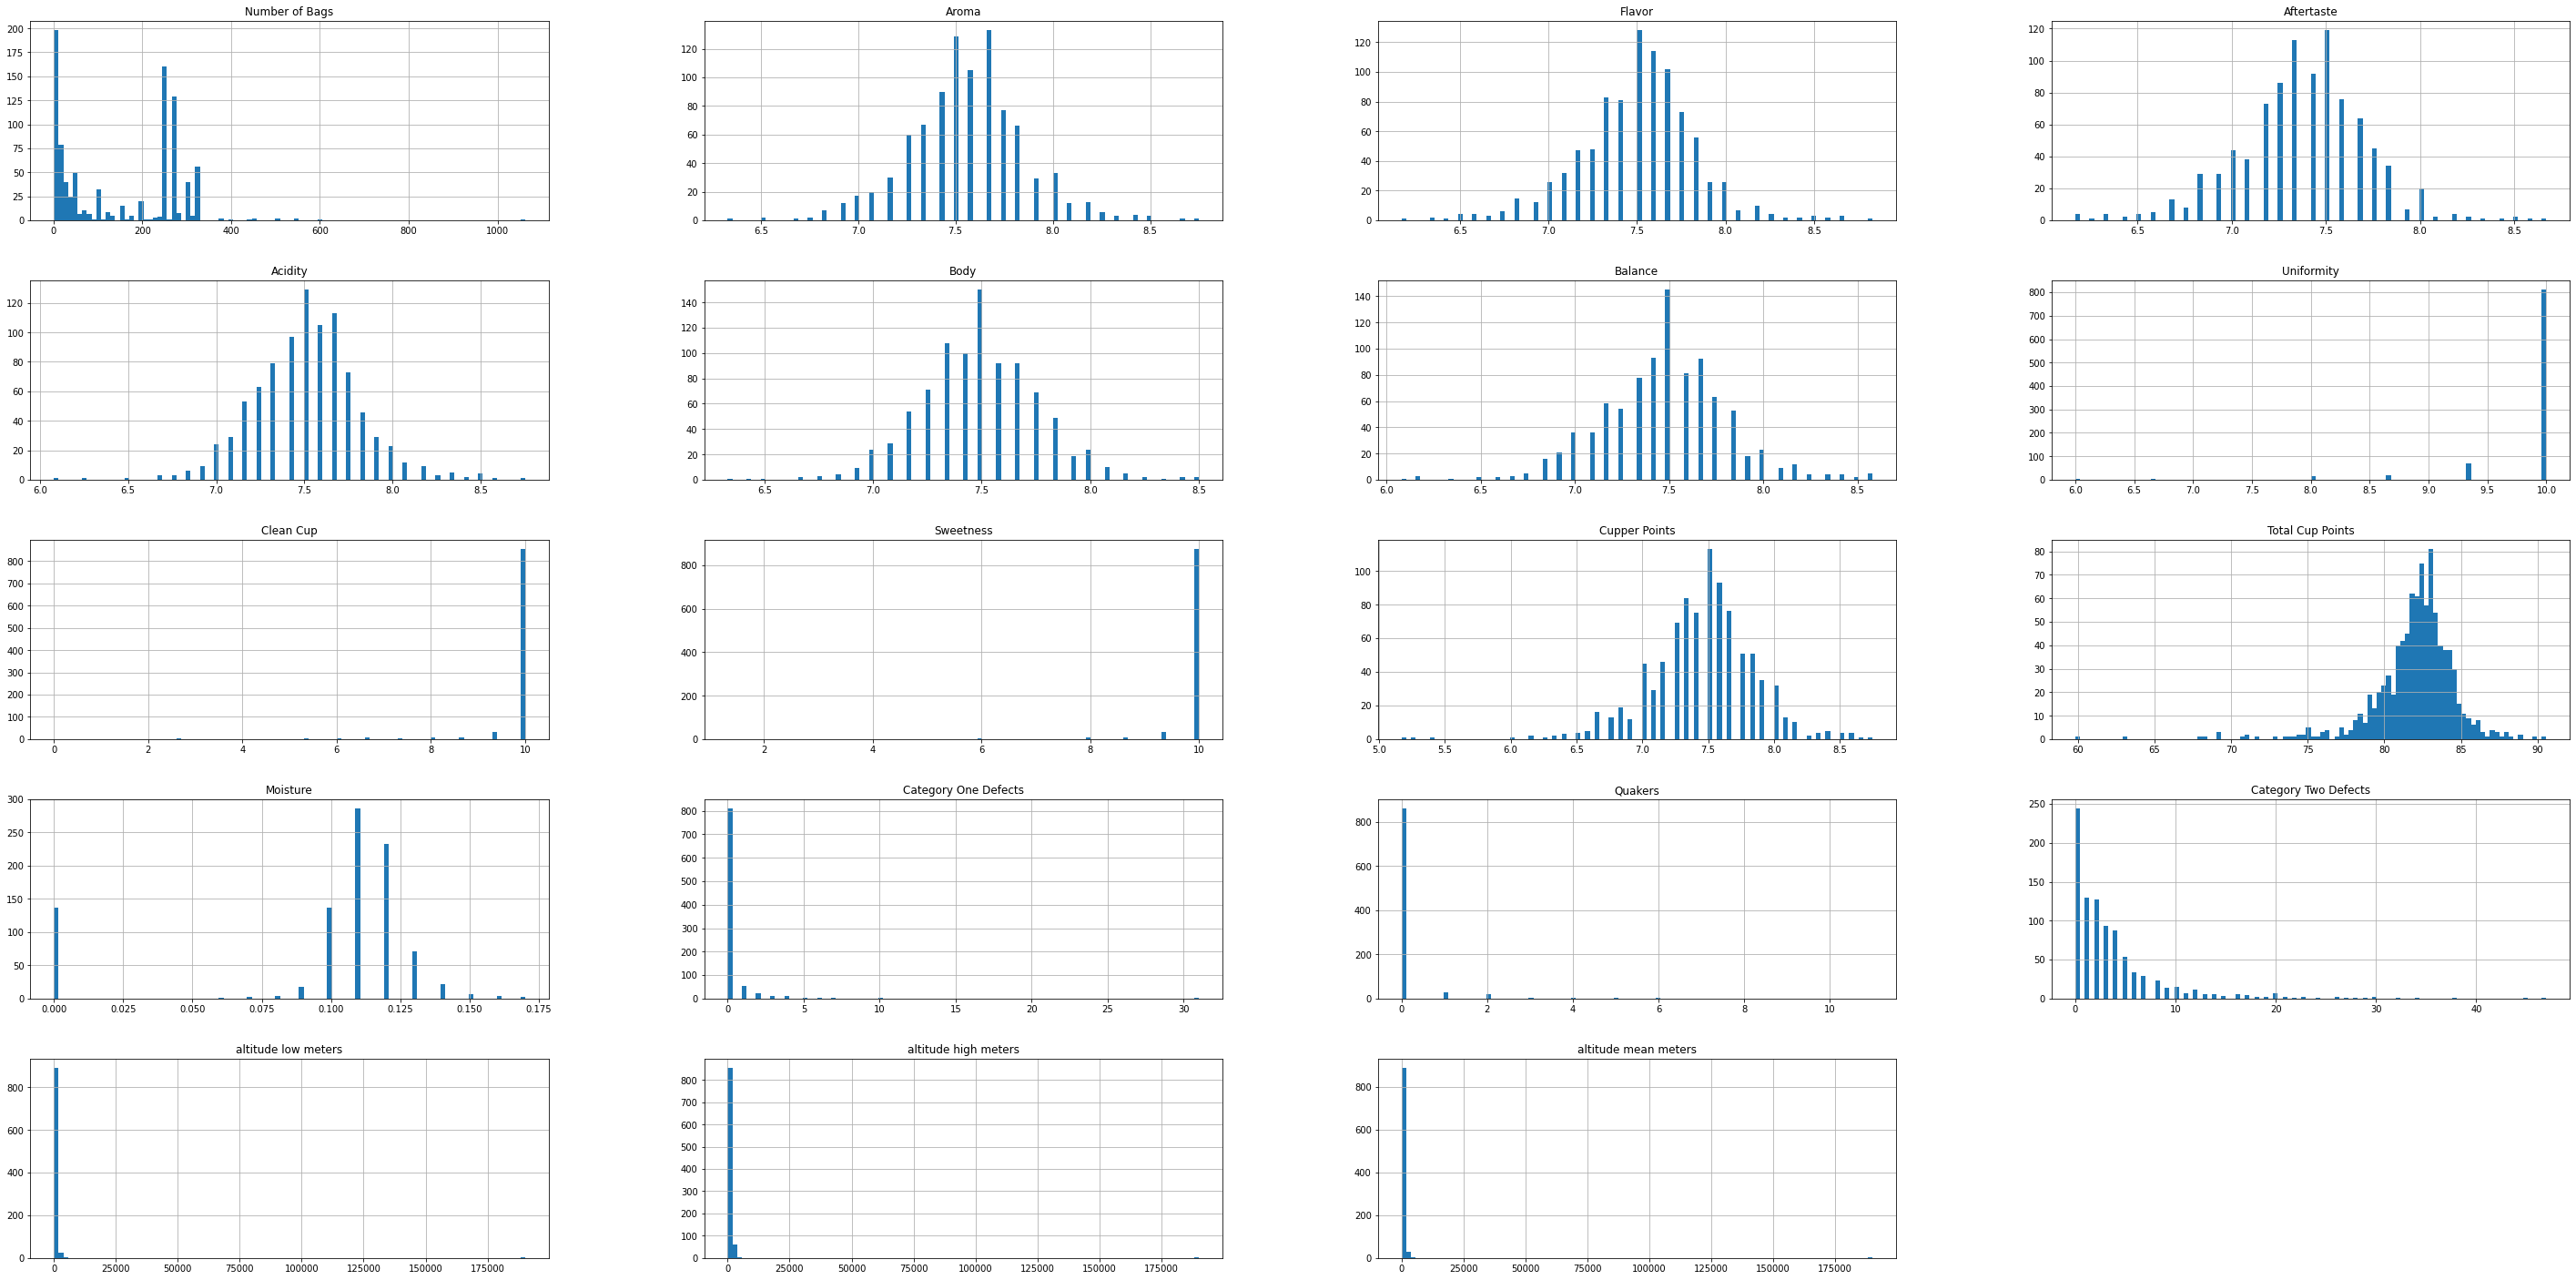

In [127]:
coffee_df_reduced.hist(bins=100, figsize = (50,25))

## cleaning outliers
* define heuristics that classify outliers for each column
* set outliers to median  

In [140]:
coffee_clean = coffee_num
coffee_clean.rename(columns = {col:col.replace('_', ' ') for col in coffee_clean.columns}, inplace=True)
coffee_clean.rename(columns = {col:col.replace('.', ' ') for col in coffee_clean.columns}, inplace=True)
for col in coffee_clean.columns:
    median = coffee_clean[col].median()
    std = coffee_clean[col].std()
    outliers = (coffee_clean[col] - median).abs() > std
    coffee_clean[outliers] = np.nan
    coffee_clean[col].fillna(median, inplace=True)

coffee_clean.describe()

/Users/anafink/OneDrive - bwedu/Bachelor MoBi/5. Fachsemester/Python Praktikum/advanced_python_2021-22_HD/venv/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/vt/szjx9jz17v3fmxv01s8bfkg40000gn/T/ipykernel_25417/1995201262.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/anafink/OneDrive - bwedu/Bachelor MoBi/5. Fachsemester/Python Praktikum/advanced_python_2021-22_HD/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a c

,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Category Two Defects,altitude low meters,altitude high meters,altitude mean meters
count,1311.0,1.311000e+03,1.311000e+03,1311.0,1.311000e+03,1.311000e+03,1.311000e+03,1311.0,1311.0,1311.0,1.311000e+03,1311.0,1311.00,1311.0,1311.0,1311.0,1311.0,1.311000e+03,1311.0
mean,175.0,7.580000e+00,7.580000e+00,7.5,7.580000e+00,7.580000e+00,7.580000e+00,10.0,10.0,10.0,7.580000e+00,83.0,0.11,0.0,0.0,2.0,1400.0,1.375800e+03,1300.0
std,0.0,8.885174e-16,8.885174e-16,0.0,8.885174e-16,8.885174e-16,8.885174e-16,0.0,0.0,0.0,8.885174e-16,0.0,0.00,0.0,0.0,0.0,0.0,2.274604e-13,0.0
min,175.0,7.580000e+00,7.580000e+00,7.5,7.580000e+00,7.580000e+00,7.580000e+00,10.0,10.0,10.0,7.580000e+00,83.0,0.11,0.0,0.0,2.0,1400.0,1.375800e+03,1300.0
25%,175.0,7.580000e+00,7.580000e+00,7.5,7.580000e+00,7.580000e+00,7.580000e+00,10.0,10.0,10.0,7.580000e+00,83.0,0.11,0.0,0.0,2.0,1400.0,1.375800e+03,1300.0
50%,175.0,7.580000e+00,7.580000e+00,7.5,7.580000e+00,7.580000e+00,7.580000e+00,10.0,10.0,10.0,7.580000e+00,83.0,0.11,0.0,0.0,2.0,1400.0,1.375800e+03,1300.0
75%,175.0,7.580000e+00,7.580000e+00,7.5,7.580000e+00,7.580000e+00,7.580000e+00,10.0,10.0,10.0,7.580000e+00,83.0,0.11,0.0,0.0,2.0,1400.0,1.375800e+03,1300.0
max,175.0,7.580000e+00,7.580000e+00,7.5,7.580000e+00,7.580000e+00,7.580000e+00,10.0,10.0,10.0,7.580000e+00,83.0,0.11,0.0,0.0,2.0,1400.0,1.375800e+03,1300.0


## Identify 
 * Which countries have more than 10 and less than 30 entries?
 * Which is the producer with most entries?
 * What is the mosts common and least common "Processing Method"

In [163]:
over10 = coffee_df_reduced['Country of Origin'].value_counts() > 10 
under30 = coffee_df_reduced['Country of Origin'].value_counts() < 30
over10_and_under30 = over10 * under30
over10_and_under30.index[over10_and_under30].to_list()


['Uganda',
 'Ethiopia',
 'Thailand',
 'Kenya',
 'China',
 'El Salvador',
 'Nicaragua',
 'Indonesia',
 'Malawi']

In [166]:
coffee_df_reduced["Producer"].value_counts().idxmax()

'Ipanema Agrícola SA'

In [167]:
coffee_df_reduced['Processing Method'].value_counts()

Washed / Wet                 673
Natural / Dry                167
Semi-washed / Semi-pulped     51
Other                         24
Pulped natural / honey         9
Name: Processing Method, dtype: int64